In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
img = cv2.imread("spider.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

chips = cv2.imread("chips.png")
chips = cv2.cvtColor(chips,cv2.COLOR_BGR2RGB)

# Selecionar uma imagem da Internet de algum filme que possua um fundo uniforme (azul ou verde, por ex.) e aplicar a técnica de _chroma-keying_.



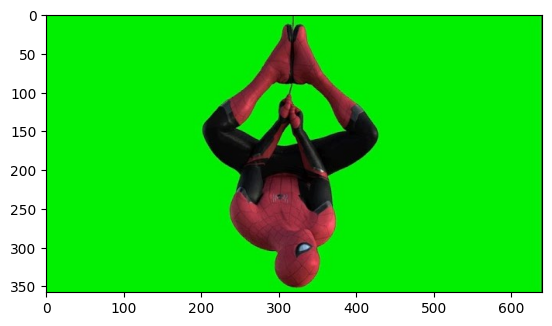

In [6]:
img_cpy = np.copy(img)
plt.imshow(img_cpy)

lower_green = np.array([0, 100, 0])     ##[R value, G value, B value]
upper_blue = np.array([120, 255, 100]) 

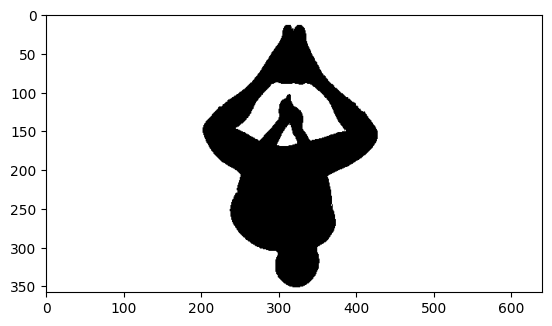

In [7]:
mask = cv2.inRange(img_cpy, lower_green, upper_blue)
plt.imshow(mask, cmap='gray')

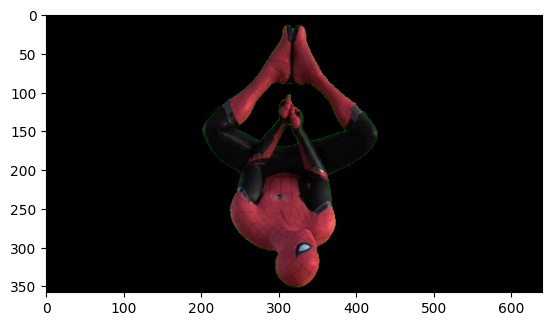

In [8]:
masked_img = np.copy(img_cpy)
masked_img[mask != 0] = [0, 0, 0]
plt.imshow(masked_img)

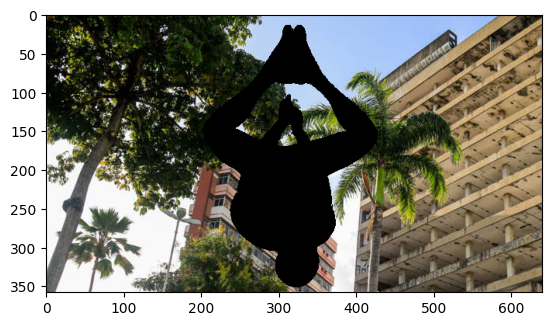

In [9]:
fundo = cv2.imread('maceio.jpg')
fundo = cv2.cvtColor(fundo, cv2.COLOR_BGR2RGB)

crop_fundo = fundo[0:358, 0:640]

crop_fundo[mask == 0] = [0, 0, 0]

plt.imshow(crop_fundo)

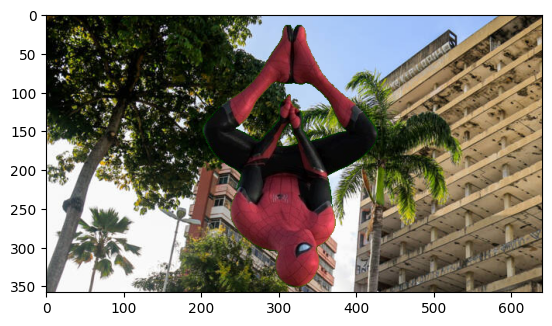

In [10]:
final_image = crop_fundo + masked_img
plt.imshow(final_image)

# Carregar uma imagem RGB e aplicar um filtro de borramento.

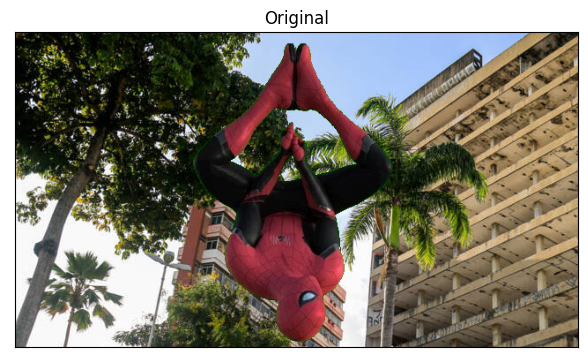

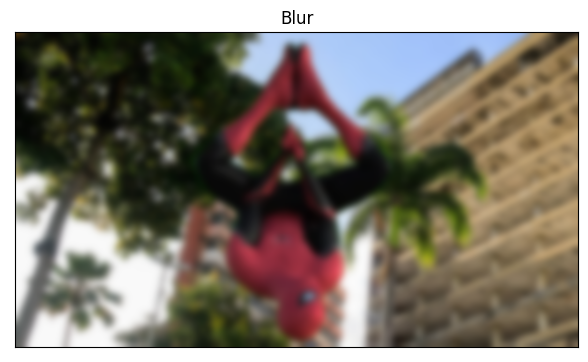

In [20]:
blur = cv2.GaussianBlur(final_image,(25,25),0)

plt.figure(figsize=(16, 12))
plt.subplot(121),plt.imshow(final_image),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.figure(figsize=(16, 12))
plt.subplot(122),plt.imshow(blur),plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.show()

# Carregar uma imagem RGB e aplicar um filtro de realçe de bordas.

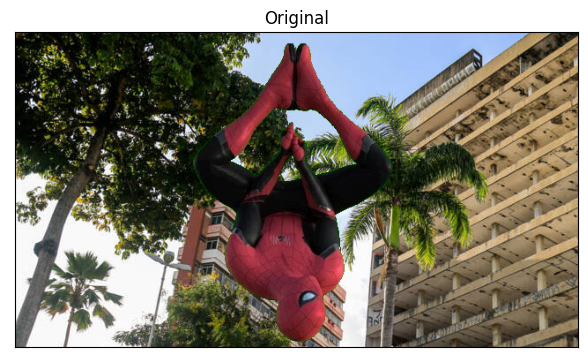

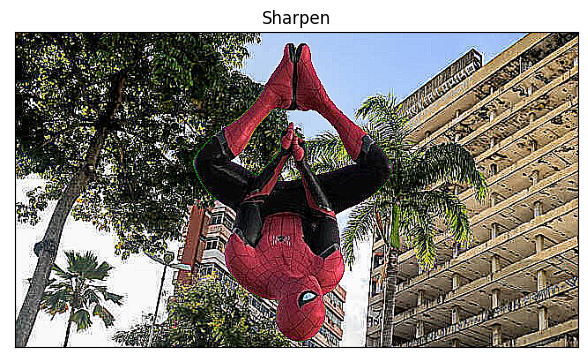

In [12]:
# Creating our sharpening filter
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Applying cv2.filter2D function on our Cybertruck image
sharpen_img_1=cv2.filter2D(final_image,-1,filter)

plt.figure(figsize=(16, 12))
plt.subplot(121),plt.imshow(final_image),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.figure(figsize=(16, 12))
plt.subplot(122),plt.imshow(sharpen_img_1),plt.title('Sharpen')
plt.xticks([]), plt.yticks([])
plt.show()

# Segmentar cada um dos 5 elementos distintos da imagem 'chips.png' do diretório da disciplina.

(Text(0.5, 1.0, 'Imagem original'),
 <matplotlib.image.AxesImage at 0x1ec60264100>)

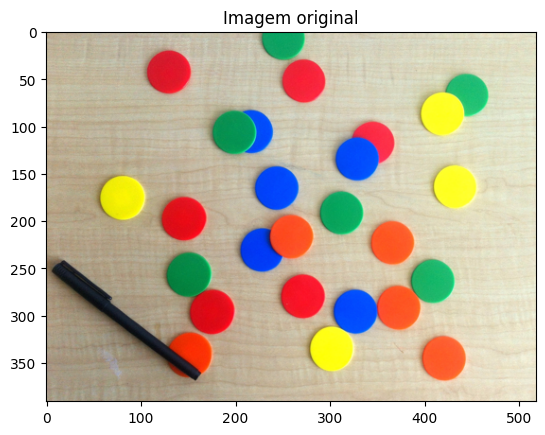

In [13]:
plt.title("Imagem original"), plt.imshow(chips)

In [14]:
chips_hsv = cv2.cvtColor(chips, cv2.COLOR_RGB2HSV)

chips_H = chips_hsv[:, :, 0]
chips_S = chips_hsv[:, :, 1]
chips_V = chips_hsv[:, :, 2]

(Text(0.5, 1.0, 'Máscara geral'),
 <matplotlib.image.AxesImage at 0x1ec602ba4a0>)

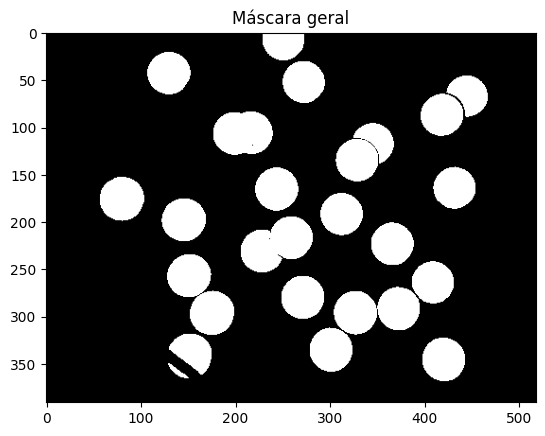

In [15]:
_, mask_geral = cv2.threshold(chips_S, 175, 255, cv2.THRESH_BINARY)
plt.title("Máscara geral"), plt.imshow(mask_geral, cmap='gray')

In [16]:
def mascara(chips_H, chips, mask_geral, inf, sup):
  mask = cv2.inRange(chips_H, inf, sup)

  result_mask = cv2.bitwise_and(mask_geral, mask)

  masked_img = np.copy(chips)
  masked_img[result_mask == 0] = [0, 0, 0]

  return masked_img, result_mask

## Mascaras dos elementos

In [17]:
masked_img_vermelho, result_vermelho = mascara(chips_H, chips, mask_geral, 175, 180)
masked_img_verde, result_verde = mascara(chips_H, chips, mask_geral, 70, 85)
masked_img_azul, result_azul = mascara(chips_H, chips, mask_geral, 100, 120)
masked_img_amarelo, result_amarelo = mascara(chips_H, chips, mask_geral, 25, 35)
masked_img_laranja, result_laranja = mascara(chips_H, chips, mask_geral, 3, 20)

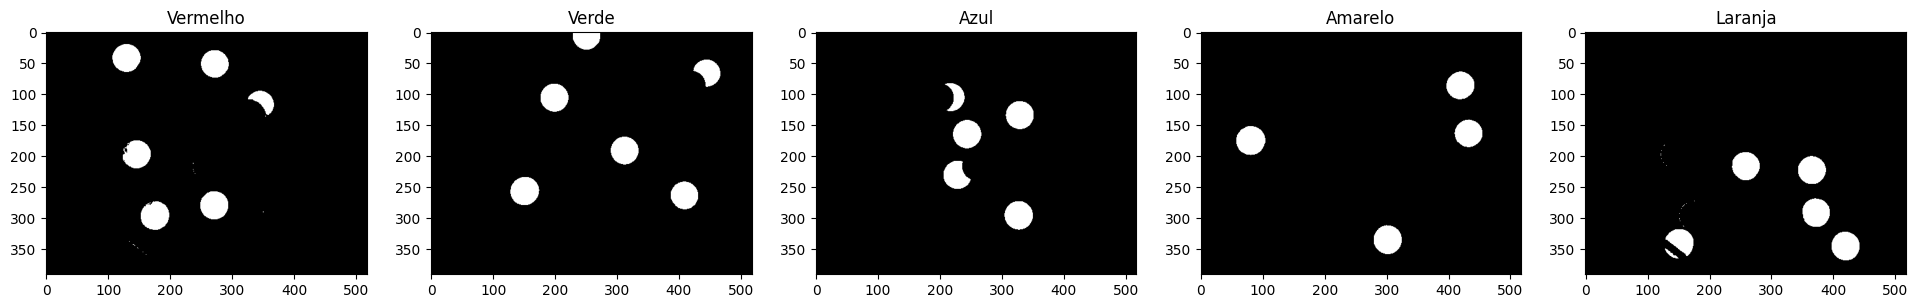

In [18]:
plt.figure(figsize=(24, 18))
plt.subplot(1,5,1), plt.title("Vermelho"), plt.imshow(result_vermelho, cmap='gray')
plt.subplot(1,5,2), plt.title("Verde"), plt.imshow(result_verde, cmap='gray')
plt.subplot(1,5,3), plt.title("Azul"), plt.imshow(result_azul, cmap='gray')
plt.subplot(1,5,4), plt.title("Amarelo"), plt.imshow(result_amarelo, cmap='gray')
plt.subplot(1,5,5), plt.title("Laranja"), plt.imshow(result_laranja, cmap='gray')
plt.show()

## Elementos segmentados

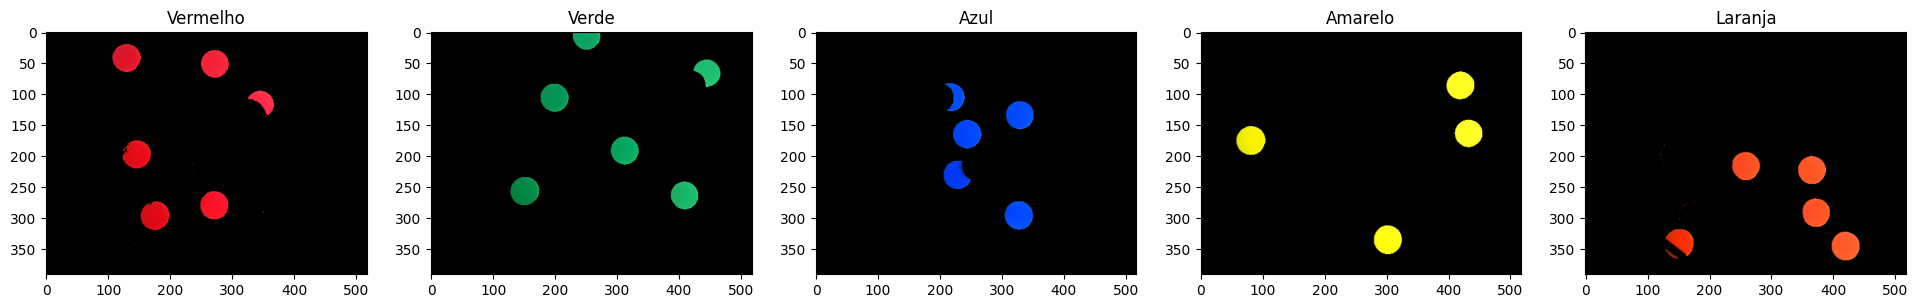

In [19]:
plt.figure(figsize=(24, 18))
plt.subplot(1,5,1), plt.title("Vermelho"), plt.imshow(masked_img_vermelho)
plt.subplot(1,5,2), plt.title("Verde"), plt.imshow(masked_img_verde)
plt.subplot(1,5,3), plt.title("Azul"), plt.imshow(masked_img_azul)
plt.subplot(1,5,4), plt.title("Amarelo"), plt.imshow(masked_img_amarelo)
plt.subplot(1,5,5), plt.title("Laranja"), plt.imshow(masked_img_laranja)
plt.show()